# Subsetting the dataset into Test and Train

In [1]:
df <- read.table("./data/FF.csv", header=T, quote="\"", sep=",")

data<-df

In [2]:
head(data)

,X,listing_id,week_num,avg_price,min_price,max_price,summary,space,description,neighborhood_overview,...,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_seniority,occupied_cat
,<int>,<int>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,...,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<fct>
1,1,27267054,12,139,139,139,"Modern dÃ©cor, King size bed, Private Entrance, Private Bathroom, Retractable TV. Room is on the 3RD FLOOR - no elevator/lift Located between the Castro & Mission Dolores districts, only 3 blocks for both MUNI Metro & BART Stations, & 4 blocks to Dolores",The room has been recently remodelled and everything is brand new. PLEASE NOTE: 1. SF homes DO NOT HAVE Air-conditioning; but room has two fans for warm days. 2. House has cats: but they don't have access to the room.,"Modern dÃ©cor, King size bed, Private Entrance, Private Bathroom, Retractable TV. Room is on the 3RD FLOOR - no elevator/lift Located between the Castro & Mission Dolores districts, only 3 blocks for both MUNI Metro & BART Stations, & 4 blocks to Dolores","Whether here for work or leisure, this location is fabulous. In the warmest part of the city, with its own micro-climate and only three blocks to the Castro, Valencia Corridor, the Mission, & Dolores Park. Located only two BART stations to Moscone Conve",...,10,10,t,flexible,f,f,1,5.78,4,Full
2,2,27267054,13,139,139,139,"Modern dÃ©cor, King size bed, Private Entrance, Private Bathroom, Retractable TV. Room is on the 3RD FLOOR - no elevator/lift Located between the Castro & Mission Dolores districts, only 3 blocks for both MUNI Metro & BART Stations, & 4 blocks to Dolores",The room has been recently remodelled and everything is brand new. PLEASE NOTE: 1. SF homes DO NOT HAVE Air-conditioning; but room has two fans for warm days. 2. House has cats: but they don't have access to the room.,"Modern dÃ©cor, King size bed, Private Entrance, Private Bathroom, Retractable TV. Room is on the 3RD FLOOR - no elevator/lift Located between the Castro & Mission Dolores districts, only 3 blocks for both MUNI Metro & BART Stations, & 4 blocks to Dolores","Whether here for work or leisure, this location is fabulous. In the warmest part of the city, with its own micro-climate and only three blocks to the Castro, Valencia Corridor, the Mission, & Dolores Park. Located only two BART stations to Moscone Conve",...,10,10,t,flexible,f,f,1,5.78,4,Low
3,3,27267054,11,139,139,139,"Modern dÃ©cor, King size bed, Private Entrance, Private Bathroom, Retractable TV. Room is on the 3RD FLOOR - no elevator/lift Located between the Castro & Mission Dolores districts, only 3 blocks for both MUNI Metro & BART Stations, & 4 blocks to Dolores",The room has been recently remodelled and everything is brand new. PLEASE NOTE: 1. SF homes DO NOT HAVE Air-conditioning; but room has two fans for warm days. 2. House has cats: but they don't have access to the room.,"Modern dÃ©cor, King size bed, Private Entrance, Private Bathroom, Retractable TV. Room is on the 3RD FLOOR - no elevator/lift Located between the Castro & Mission Dolores districts, only 3 blocks for both MUNI Metro & BART Stations, & 4 blocks to Dolores","Whether here for work or leisure, this location is fabulous. In the warmest part of the city, with its own micro-climate and only three blocks to the Castro, Valencia Corridor, the Mission, & Dolores Park. Located only two BART stations to Moscone Conve",...,10,10,t,flexible,f,f,1,5.78,4,Medium
4,4,27267054,14,139,139,139,"Modern dÃ©cor, King size bed, Private Entrance, Private Bathroom, Retractable TV. Room is on the 3RD FLOOR - no elevator/lift Located between the Castro & Mission Dolores districts, only 3 blocks for both MUNI Metro & BART Stations, & 4 blocks to Dolores",The room has been recently remodelled and everything is brand new. PLEASE NOTE: 1. SF homes DO NOT 

In [3]:
summary(data)

       X            listing_id          week_num       avg_price       
 Min.   :     1   Min.   :     958   Min.   : 1.00   Min.   :    10.0  
 1st Qu.: 70887   1st Qu.: 6628985   1st Qu.:15.00   1st Qu.:   100.0  
 Median :141773   Median :15957963   Median :28.00   Median :   153.6  
 Mean   :141773   Mean   :16850127   Mean   :28.11   Mean   :   220.5  
 3rd Qu.:212658   3rd Qu.:27111574   3rd Qu.:43.00   3rd Qu.:   247.9  
 Max.   :283544   Max.   :40569280   Max.   :53.00   Max.   :150393.4  
                                                                       
   min_price          max_price       
 Min.   :    10.0   Min.   :    10.0  
 1st Qu.:    97.0   1st Qu.:   105.0  
 Median :   149.0   Median :   160.0  
 Mean   :   208.9   Mean   :   235.7  
 3rd Qu.:   230.0   3rd Qu.:   258.0  
 Max.   :112010.0   Max.   :181007.0  
                                      
                                                                                                                

In [4]:
if(!require(tableone)){install.packages("tableone");require(tableone)}

Loading required package: tableone

Warning message:
"package 'tableone' was built under R version 3.6.3"


## Remove String features

In [5]:
string_features<-c('summary','space', 'description', 'neighborhood_overview','notes','transit','host_about','amenities')
data<-data[,setdiff(names(data), string_features)]
names(data)

[1] "X"                                "listing_id"                      
 [3] "week_num"                         "avg_price"                       
 [5] "min_price"                        "max_price"                       
 [7] "host_is_superhost"                "host_identity_verified"          
 [9] "neighbourhood_cleansed"           "zipcode"                         
[11] "latitude"                         "longitude"                       
[13] "is_location_exact"                "property_type"                   
[15] "room_type"                        "accommodates"                    
[17] "bathrooms"                        "bedrooms"                        
[19] "beds"                             "bed_type"                        
[21] "security_deposit"                 "cleaning_fee"                    
[23] "guests_included"                  "extra_people"                    
[25] "minimum_nights"                   "maximum_nights"                  
[27] "number_of_reviews"                "review_scores_accuracy"          
[29] "review_scores_cleanliness"        "review_scores_checkin"           
[31] "review_scores_communication"      "review_scores_location"          
[33] "review_scores_value"              "instant_bookable"                
[35] "cancellation_policy"              "require_guest_profile_picture"   
[37] "require_guest_phone_verification" "calculated_host_listings_count"  
[39] "reviews_per_month"                "host_seniority"                  
[41] "occupied_cat"

In [6]:
vn <- setdiff(names(data),c("occupied", "X"))
CreateTableOne(data = data,vars = vn,includeNA = T,strata = "occupied_cat")

                                            Stratified by occupied_cat
                                             Full                     
  n                                                97952              
  listing_id (mean (SD))                     19764375.43 (11404070.30)
  week_num (mean (SD))                             26.47 (14.15)      
  avg_price (mean (SD))                           214.88 (241.75)     
  min_price (mean (SD))                           207.43 (232.37)     
  max_price (mean (SD))                           224.90 (257.58)     
  host_is_superhost (%)                                               
                                                      47 (  0.0)      
     f                                             55330 ( 56.5)      
     t                                             42575 ( 43.5)      
  host_identity_verified (%)                                          
                                                      47 (  0.0)      
     f

In [7]:
#library(devtools)
#install_github("karpatit/mechkar")
require(mechkar)

Loading required package: mechkar



In [8]:
Table1(data = data,x = vn,y = "occupied_cat")

Warning message in Table1(data = data, x = vn, y = "occupied_cat"):
"The following variables have unique values and will not be included in the analysis: "


  |======================================================================| 100%

Warning message in `[<-.factor`(`*tmp*`, iseq, value = "Full"):
"invalid factor level, NA generated"
Warning message:
"Column `Del` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V1` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V2` joining character vector and factor, coercing into character vector"
Warning message:
"Column `n` joining character vector and factor, coercing into character vector"


  |======================================================================| 100%

Warning message in `[<-.factor`(`*tmp*`, iseq, value = "Low"):
"invalid factor level, NA generated"
Warning message:
"Column `Del` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V1` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V2` joining character vector and factor, coercing into character vector"
Warning message:
"Column `n` joining character vector and factor, coercing into character vector"


  |======================================================================| 100%

Warning message in `[<-.factor`(`*tmp*`, iseq, value = "Medium"):
"invalid factor level, NA generated"
Warning message:
"Column `Del` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V1` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V2` joining character vector and factor, coercing into character vector"
Warning message:
"Column `n` joining character vector and factor, coercing into character vector"


  |====================================================================  |  98%

Warning message:
"Column `V1` joining character vector and factor, coercing into character vector"
Warning message:
"Column `n` joining character vector and factor, coercing into character vector"


V1,V2,Pop,Full,Low,Medium,pval
<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>
Individuals,n,283544,97952,130755,54837,NA
listing_id,Mean (SD),"16,850,126.5 (11,444,451.5)","19,764,375.4 (11,404,070.3)","13,875,299.4 (10,650,864.1)","18,737,848.3 (11,601,853.3)",NA
listing_id,Median (IQR),"15,957,963.0 (6,628,985.0-27,111,574.0)","21,966,303.0 (9,431,997.0-30,150,673.0)","11,436,683.0 (4,998,039.0-21,028,058.0)","20,217,846.0 (7,939,511.0-29,193,207.0)",0
week_num,Mean (SD),28.1 (15.7),26.5 (14.1),29.8 (17.0),27.0 (14.9),NA
week_num,Median (IQR),28.0 (15.0-43.0),26.0 (15.0-38.0),31.0 (15.0-47.0),27.0 (14.0-40.0),0
avg_price,Mean (SD),220.5 (542.0),214.9 (241.8),229.9 (758.9),207.9 (201.6),NA
avg_price,Median (IQR),153.6 (100.0-247.9),161.0 (107.9-243.0),150.0 (95.0-250.0),150.4 (103.6-241.9),0
min_price,Mean (SD),208.9 (491.9),207.4 (232.4),218.5 (686.0),188.5 (178.6),NA
min_price,Median (IQR),149.0 (97.0-230.0),157.0 (101.0-233.0),146.0 (90.0-236.0),140.0 (96.0-215.0),0


## Test dataset

In [9]:
tab1 <- train_test(data = data, train_name = "temp", test_name = "test",prop = 0.8, seed = 123, tableone=T)

Dataset partitioned into:

 + Train dataset: temp

 + Test dataset: test

Warning message in Table1(data = df, y = "traintest_ind_", messages = FALSE):
"The following variables have unique values and will not be included in the analysis: "


  |======================================================================| 100%

Warning message in `[<-.factor`(`*tmp*`, iseq, value = "1"):
"invalid factor level, NA generated"
Warning message:
"Column `Del` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V1` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V2` joining character vector and factor, coercing into character vector"
Warning message:
"Column `n` joining character vector and factor, coercing into character vector"


  |======================================================================| 100%

Warning message in `[<-.factor`(`*tmp*`, iseq, value = "2"):
"invalid factor level, NA generated"
Warning message:
"Column `Del` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V1` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V2` joining character vector and factor, coercing into character vector"
Warning message:
"Column `n` joining character vector and factor, coercing into character vector"


  |====================================================================  |  98%

Warning message:
"Column `V1` joining character vector and factor, coercing into character vector"
Warning message:
"Column `n` joining character vector and factor, coercing into character vector"
Warning message in Ops.factor(pval, 0.05):
"'<' not meaningful for factors"
 

You got a perfectly balanced training and test datasets

 



In [10]:
dim(temp)
dim(test)

[1] 226835     41

[1] 56709    41

In [11]:
tab1

V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<fct>,<fct>,<fct>
Individuals,n,283544,226835,56709,NA
X,Mean (SD),"141,772.5 (81,852.2)","141,859.5 (81,886.4)","141,424.3 (81,715.2)",NA
X,Median (IQR),"141,772.5 (70,886.8-212,658.2)","141,942.0 (70,991.5-212,746.0)","141,070.0 (70,469.0-212,293.0)",0.257
listing_id,Mean (SD),"16,850,126.5 (11,444,451.5)","16,856,002.8 (11,444,520.6)","16,826,621.5 (11,444,245.7)",NA
listing_id,Median (IQR),"15,957,963.0 (6,628,985.0-27,111,574.0)","15,970,624.0 (6,643,496.0-27,161,084.0)","15,929,904.0 (6,627,450.0-27,056,649.0)",0.585
week_num,Mean (SD),28.1 (15.7),28.1 (15.8),28.1 (15.7),NA
week_num,Median (IQR),28.0 (15.0-43.0),28.0 (15.0-43.0),28.0 (15.0-42.0),0.633
avg_price,Mean (SD),220.5 (542.0),219.8 (469.5),223.1 (766.1),NA
avg_price,Median (IQR),153.6 (100.0-247.9),153.7 (100.0-248.0),153.1 (100.0-247.4),0.337


## Train and Dev

In [12]:
tab2 <- train_test(data = temp, train_name = "train", test_name = "dev",prop = 0.8, seed = 123, tableone=T)

Dataset partitioned into:

 + Train dataset: train

 + Test dataset: dev

Warning message in Table1(data = df, y = "traintest_ind_", messages = FALSE):
"The following variables have unique values and will not be included in the analysis: "


  |======================================================================| 100%

Warning message in `[<-.factor`(`*tmp*`, iseq, value = "1"):
"invalid factor level, NA generated"
Warning message:
"Column `Del` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V1` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V2` joining character vector and factor, coercing into character vector"
Warning message:
"Column `n` joining character vector and factor, coercing into character vector"


  |======================================================================| 100%

Warning message in `[<-.factor`(`*tmp*`, iseq, value = "2"):
"invalid factor level, NA generated"
Warning message:
"Column `Del` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V1` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V2` joining character vector and factor, coercing into character vector"
Warning message:
"Column `n` joining character vector and factor, coercing into character vector"


  |====================================================================  |  98%

Warning message:
"Column `V1` joining character vector and factor, coercing into character vector"
Warning message:
"Column `n` joining character vector and factor, coercing into character vector"
Warning message in Ops.factor(pval, 0.05):
"'<' not meaningful for factors"
 

You got a perfectly balanced training and test datasets

 



In [13]:
dim(train)
dim(dev)

[1] 181468     41

[1] 45367    41

In [14]:
tab2

V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<fct>,<fct>,<fct>
Individuals,n,226835,181468,45367,NA
X,Mean (SD),"141,859.5 (81,886.4)","141,729.6 (81,944.8)","142,379.4 (81,651.1)",NA
X,Median (IQR),"141,942.0 (70,991.5-212,746.0)","141,739.0 (70,690.8-212,673.5)","142,717.0 (72,156.0-213,020.5)",0.131
listing_id,Mean (SD),"16,856,002.8 (11,444,520.6)","16,870,043.0 (11,444,415.4)","16,799,842.0 (11,444,895.2)",NA
listing_id,Median (IQR),"15,970,624.0 (6,643,496.0-27,161,084.0)","15,984,490.0 (6,648,062.0-27,211,235.0)","15,920,878.0 (6,601,749.0-26,921,699.0)",0.243
week_num,Mean (SD),28.1 (15.8),28.1 (15.8),28.1 (15.7),NA
week_num,Median (IQR),28.0 (15.0-43.0),28.0 (14.0-43.0),28.0 (15.0-42.0),0.876
avg_price,Mean (SD),219.8 (469.5),220.2 (491.7),218.4 (367.6),NA
avg_price,Median (IQR),153.7 (100.0-248.0),154.0 (100.0-248.0),153.0 (100.0-246.1),0.402


In [15]:
### save memeory, remove the datasets that will not be used more...
rm(temp,data)

Checking the distribution of the outcome on the three subsets

Loading required package: ggplot2



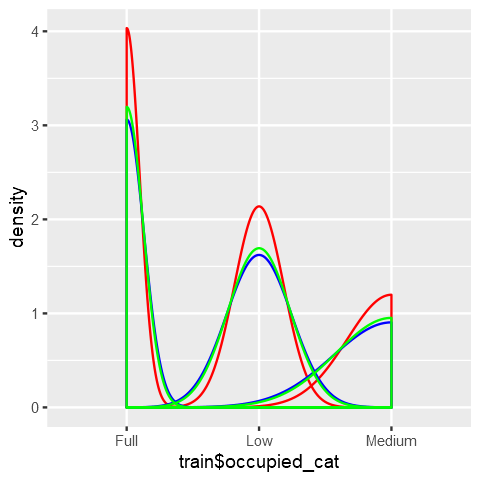

In [16]:
require(ggplot2)

options(repr.plot.width = 4, repr.plot.height = 4)

ggplot() +
    geom_density(aes(x=train$occupied_cat),color="red",alpha=0.3) +
    geom_density(aes(x=dev$occupied_cat),color="blue",alpha=0.3) +
    geom_density(aes(x=test$occupied_cat),color="green",alpha=0.3)


## Merge with original dataset to return the Text features

In [17]:
test.df<-merge(x=test,y=df[c("X", string_features)],by="X")

train.df<-merge(x=train,y=df[c("X", string_features)],by="X")

dev.df<-merge(x=dev,y=df[c("X", string_features)],by="X")

dim(test)
dim(test.df)

dim(train)
dim(train.df)

dim(dev)
dim(dev.df)

[1] 56709    41

[1] 56709    49

[1] 181468     41

[1] 181468     49

[1] 45367    41

[1] 45367    49

# Store dataframes in 3 different files

In [18]:
write.csv(test.df,"./data/FF_test.csv", row.names = FALSE)
write.csv(train.df,"./data/FF_train.csv", row.names = FALSE)
write.csv(dev.df,"./data/FF_dev.csv", row.names = FALSE)

In [19]:
library(dplyr)

dim(dev.df %>% filter(occupied_cat == "Full"))
dim(dev.df %>% filter(occupied_cat == "Medium"))
dim(dev.df %>% filter(occupied_cat == "Low"))


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




[1] 15756    49

[1] 8607   49

[1] 21004    49

In [20]:
dim(test)
dim(train)
dim(dev)


[1] 56709    41

[1] 181468     41

[1] 45367    41